<a href="https://colab.research.google.com/github/davidacunalopez/Convolutional_network_project/blob/main/Proyecto01_RedesNeuronales_Espectrogramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Curso de Inteligencia Artificial - Proyecto 1                                          
#### Elaborado por:
- Priscilla Jiménez Salgado
- Fabián Araya Ortega
- David Acuña López

# A. Lectura del Dataset Y Generación de espectogramas categorizados

In [ ]:
# === 0. Librerías necesarias ===
from google.colab import drive
import os
import zipfile
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

# === 1. Montar Google Drive ===
drive.mount('/content/drive',force_remount=True)

# === 2. Definir rutas en Drive ===
base_path = '/content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas'
zip_path = os.path.join(base_path, 'ESC-50_audio_dataset_raw.zip'),
meta_path = os.path.join(base_path, 'esc50.csv')
output_dir = os.path.join(base_path, 'ESC-50_spectrograms')
extract_path = os.path.join(base_path, 'ESC-50_audio_dataset_raw')

# === 3. Descomprimir si no existe la carpeta "audio" ===
audio_dir = os.path.join(extract_path, 'audio')

if not os.path.exists(audio_dir):
    print("Descomprimiendo el archivo ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Descompresión completada.")
else:
    print("⚙️ Carpeta 'audio' ya existente, se omite la descompresión.")

# === 4. Cargar metadatos ===
metadata = pd.read_csv(meta_path)
print("\nEjemplo de metadatos:")
print(metadata.head())

# === 5. Crear carpeta de salida para imágenes ===
os.makedirs(output_dir, exist_ok=True)
print(f"\nDirectorio de salida asegurado: {output_dir}")

# === 6. Función para generar y guardar espectrogramas ===
def save_spectrogram(audio_path, output_path, duration=5.0):
    y, sr = librosa.load(audio_path, sr=None)
    # Normalizar duración para uniformidad
    y = librosa.util.fix_length(y, size=int(sr * duration))

    # Calcular espectrograma tipo Mel
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Graficar y guardar
    plt.figure(figsize=(2.24, 2.24))
    librosa.display.specshow(S_dB, sr=sr, cmap='magma')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# === 7. Recorrer todos los audios y generar imágenes ===
print("\n🔄 Generando espectrogramas...")
for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file = row['filename']
    label = str(row['category'])

    audio_path = os.path.join(audio_dir, file)
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    output_path = os.path.join(label_dir, file.replace('.wav', '.png'))

    # 👇 Verificar si ya existe la imagen
    if os.path.exists(output_path):
        # Si ya existe, puedes mostrar un mensaje opcional (o simplemente continuar)
        # print(f"✅ Ya existe: {output_path}")
        continue

    try:
        save_spectrogram(audio_path, output_path)
    except Exception as e:
        print(f"⚠️ Error con {file}: {e}")

print("\n✅ Espectrogramas generados correctamente en:")
print(output_dir)


Mounted at /content/drive
⚙️ Carpeta 'audio' ya existente, se omite la descompresión.

Ejemplo de metadatos:
            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

Directorio de salida asegurado: /content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas/ESC-50_spectrograms

🔄 Generando espectrogramas...


100%|██████████| 2000/2000 [00:04<00:00, 406.81it/s]


✅ Espectrogramas generados correctamente en:
/content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas/ESC-50_spectrograms


🎧 Audio seleccionado: 2-108767-B-9.wav
📂 Categoría: crow | Fold: 2


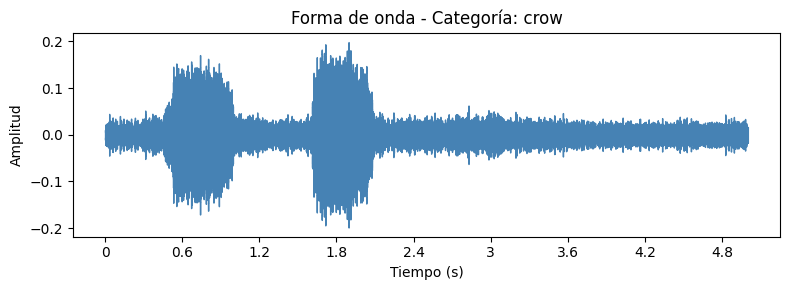

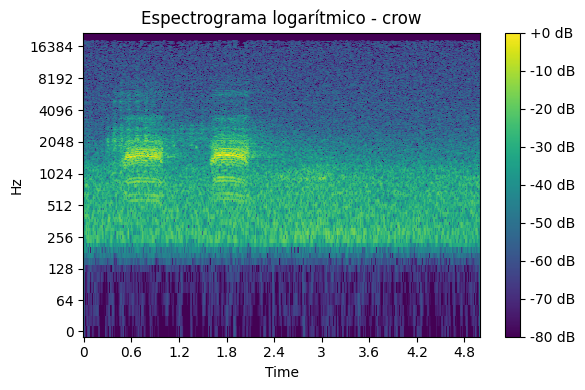

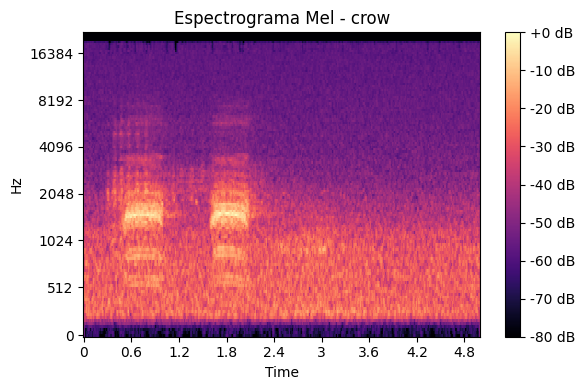


📘 Justificación teórica del preprocesamiento:

Ejemplo ilustrativo:
- Archivo: 2-108767-B-9.wav
- Categoría: crow
- Frecuencia de muestreo: 44100 Hz

1. Se aplicó una conversión de audio en forma de onda (señal temporal) a espectrograma,
   que representa la distribución de energía en el dominio tiempo-frecuencia.
   Este paso es fundamental para que una red neuronal convolucional pueda analizar
   patrones espaciales de frecuencia y tiempo, análogos a los patrones visuales en imágenes.

2. El uso de la escala Mel se justifica porque imita la percepción auditiva humana:
   la escala de Mel comprime las frecuencias altas y expande las bajas,
   reflejando mejor cómo percibimos el sonido.

3. Cada espectrograma se normalizó en duración (5 segundos) y nivel de potencia,
   garantizando homogeneidad en los datos de entrada.

4. Las imágenes finales son de 128 bandas de Mel y proporciones cuadradas,
   lo que facilita su uso en modelos CNN preentrenados como VGG, ResNet o EfficientNet.



In [ ]:
# === Documentación teórica e ilustrativa del preprocesamiento ===
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import random
import os

# Ruta de un audio de ejemplo (aleatorio)
sample_audio = random.choice([f for f in os.listdir(audio_dir) if f.endswith('.wav')])
audio_path = os.path.join(audio_dir, sample_audio)

# Buscar información del audio en el CSV (metadata)
audio_info = metadata[metadata['filename'] == sample_audio]
if not audio_info.empty:
    category = audio_info.iloc[0]['category']
    fold = audio_info.iloc[0]['fold']
else:
    category = "Desconocido"
    fold = "N/A"

print(f"🎧 Audio seleccionado: {sample_audio}")
print(f"📂 Categoría: {category} | Fold: {fold}")

# === 1. Visualizar forma de onda ===
y, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(8, 3))
librosa.display.waveshow(y, sr=sr, color='steelblue')
plt.title(f"Forma de onda - Categoría: {category}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.savefig("/content/waveform_example.png", dpi=300)
plt.show()

# === 2. Espectrograma lineal (sin escala Mel) ===
S = np.abs(librosa.stft(y))
S_dB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(6, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Espectrograma logarítmico - {category}")
plt.tight_layout()
plt.savefig("/content/spectrogram_linear_example.png", dpi=300)
plt.show()

# === 3. Espectrograma Mel (usado para redes neuronales) ===
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(6, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Espectrograma Mel - {category}")
plt.tight_layout()
plt.savefig("/content/spectrogram_mel_example.png", dpi=300)
plt.show()

# === 4. Justificación teórica automática (texto explicativo) ===
print(f"""
📘 Justificación teórica del preprocesamiento:

Ejemplo ilustrativo:
- Archivo: {sample_audio}
- Categoría: {category}
- Frecuencia de muestreo: {sr} Hz

1. Se aplicó una conversión de audio en forma de onda (señal temporal) a espectrograma,
   que representa la distribución de energía en el dominio tiempo-frecuencia.
   Este paso es fundamental para que una red neuronal convolucional pueda analizar
   patrones espaciales de frecuencia y tiempo, análogos a los patrones visuales en imágenes.

2. El uso de la escala Mel se justifica porque imita la percepción auditiva humana:
   la escala de Mel comprime las frecuencias altas y expande las bajas,
   reflejando mejor cómo percibimos el sonido.

3. Cada espectrograma se normalizó en duración (5 segundos) y nivel de potencia,
   garantizando homogeneidad en los datos de entrada.

4. Las imágenes finales son de 128 bandas de Mel y proporciones cuadradas,
   lo que facilita su uso en modelos CNN preentrenados como VGG, ResNet o EfficientNet.
""")



In [ ]:
# === BLOQUE DE DATA AUGMENTATION (OFFLINE SIN SpecAugment) ===
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random

# === 1. Directorios ===
augmented_dir = os.path.join(base_path, 'ESC-50_spectrograms_augmented')
os.makedirs(augmented_dir, exist_ok=True)
print(f"📁 Carpeta de salida asegurada: {augmented_dir}")

# (Opcional) Semilla para reproducibilidad de la elección aleatoria
random.seed(42)
np.random.seed(42)

# === 2. Funciones de aumentación (señal) ===
def add_noise(y, noise_factor=0.005):
    """Agrega ruido blanco y renormaliza para evitar saturación."""
    y_noisy = y + noise_factor * np.random.randn(len(y))
    return y_noisy / (np.max(np.abs(y_noisy)) + 1e-8)

def time_stretch(y, rate=1.1):
    """Acelera o desacelera ligeramente el audio."""
    return librosa.effects.time_stretch(y=y, rate=rate)

def pitch_shift(y, sr, n_steps=2):
    """Cambia el tono del audio sin alterar su duración."""
    return librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)

# === 3. Función principal para generar espectrogramas aumentados ===
def save_augmented_spectrogram(audio_path, output_path, sr_target=None, duration=5.0):
    y, sr = librosa.load(audio_path, sr=sr_target)
    # Normalizar duración para homogeneidad
    y = librosa.util.fix_length(y, size=int(sr * duration))

    # Elegir aleatoriamente una técnica de augmentación en la señal
    choice = random.choice(["noise", "stretch", "pitch"])
    if choice == "noise":
        y_aug = add_noise(y)
        aug_tag = "noise"
    elif choice == "stretch":
        y_aug = time_stretch(y, rate=random.uniform(0.9, 1.1))
        aug_tag = "stretch"
    else:
        y_aug = pitch_shift(y, sr, n_steps=random.choice([-2, -1, 1, 2]))
        aug_tag = "pitch"

    # Renormalizar por seguridad
    y_aug = y_aug / (np.max(np.abs(y_aug)) + 1e-8)

    # Espectrograma Mel (log) estable
    S = librosa.feature.melspectrogram(y=y_aug, sr=sr, n_mels=128)
    S = np.where(S == 0, 1e-10, S)             # evitar log(0)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Guardar imagen
    plt.figure(figsize=(2.24, 2.24))
    librosa.display.specshow(S_dB, sr=sr, cmap='magma')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    return aug_tag

# === 4. Generar espectrogramas aumentados para todos los audios ===
print("\n🎛 Aplicando augmentación (señal) y generando espectrogramas...")
for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file = row['filename']
    label = str(row['category'])

    audio_path = os.path.join(audio_dir, file)
    label_dir = os.path.join(augmented_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    output_path = os.path.join(label_dir, file.replace('.wav', '_aug.png'))

    if os.path.exists(output_path):
        continue

    try:
        _ = save_augmented_spectrogram(audio_path, output_path)
    except Exception as e:
        print(f"⚠️ Error con {file}: {e}")

print("\n✅ Espectrogramas aumentados (offline) generados en:")
print(augmented_dir)

# === 5. Justificación teórica automática (para el informe IEEE) — versión actualizada ===
print(r"""
📘 Justificación teórica del Data Augmentation (OFFLINE) — para incluir en el informe IEEE

Para incrementar la variabilidad de las muestras y mejorar la capacidad de generalización de las CNN,
se aplicaron transformaciones en la señal de audio, de manera aleatoria, antes de computar los espectrogramas Mel. Con fines
de trazabilidad y reproducibilidad, se generó un conjunto aumentado en disco que replica la estructura
del conjunto crudo para todo el dataset.

Transformaciones aplicadas (señal → Mel):
1) Additive Noise (baja energía): simula entornos ruidosos y variaciones de grabación.
2) Time Stretching (≈±10%): modela diferencias naturales de velocidad/ritmo o prosodia.
3) Pitch Shifting (±1–2 semitonos): emula variaciones de tono (fuente vocal, instrumentos).

Estas técnicas preservan la identidad semántica de la clase y están ampliamente reportadas como eficaces
en reconocimiento de voz/sonidos. En el protocolo de entrenamiento, el conjunto aumentado se utiliza
EXCLUSIVAMENTE en el split de entrenamiento. Los conjuntos de validación y prueba se evalúan SIEMPRE
con datos crudos para asegurar una medición imparcial y comparable entre modelos.

🔎 Nota sobre SpecAugment (Park et al., 2019 [2]):
SpecAugment (enmascaramiento tiempo/frecuencia y opcional time warping) no se “horneó” en las imágenes
offline. Se aplica ONLINE durante el entrenamiento como regularizador estocástico sobre los tensores
espectrales (máscaras distintas por batch/época), evitando artefactos fijos y sin alterar validación/prueba.
""")



📁 Carpeta de salida asegurada: /content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas/ESC-50_spectrograms_augmented

🎛 Aplicando augmentación (señal) y generando espectrogramas...


100%|██████████| 2000/2000 [00:22<00:00, 89.59it/s] 


✅ Espectrogramas aumentados (offline) generados en:
/content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas/ESC-50_spectrograms_augmented

📘 Justificación teórica del Data Augmentation (OFFLINE) — para incluir en el informe IEEE

Para incrementar la variabilidad de las muestras y mejorar la capacidad de generalización de las CNN,
se aplicaron transformaciones en la señal de audio, de manera aleatoria, antes de computar los espectrogramas Mel. Con fines
de trazabilidad y reproducibilidad, se generó un conjunto aumentado en disco que replica la estructura
del conjunto crudo para todo el dataset.

Transformaciones aplicadas (señal → Mel):
1) Additive Noise (baja energía): simula entornos ruidosos y variaciones de grabación.
2) Time Stretching (≈±10%): modela diferencias naturales de velocidad/ritmo o prosodia.
3) Pitch Shifting (±1–2 semitonos): emula variaciones de tono (fuente vocal, instrumentos).

Estas técnicas preservan la identidad semántica de la

🎧 Categoría seleccionada: frog
🖼️ Raw: /content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas/ESC-50_spectrograms/frog/5-156026-A-4.png
🖼️ Aug: /content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas/ESC-50_spectrograms_augmented/frog/5-156026-A-4_aug.png


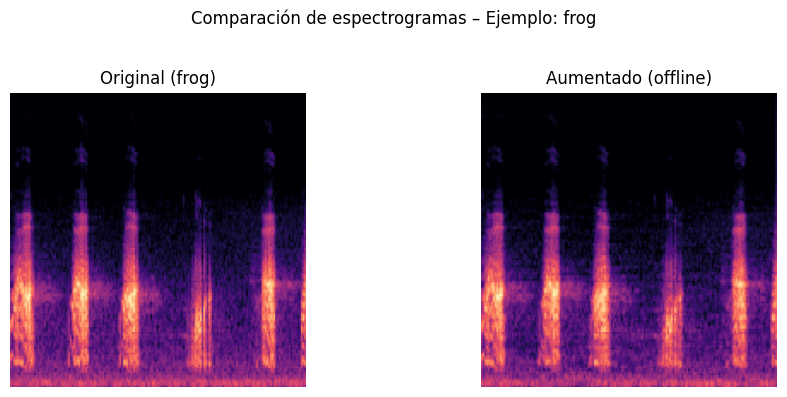


📊 Figura generada: '/content/comparativa_espectrogramas_from_disk.png'

📝 Sugerencia para el informe IEEE:

Figura X. Comparación visual entre un espectrograma Mel original (izquierda) y su versión aumentada
(offline) a partir de transformaciones en la señal (ruido, estiramiento temporal o cambio de tono).
Las imágenes corresponden a la misma categoría, permitiendo apreciar que la augmentación preserva
la estructura semántica del patrón acústico mientras introduce variabilidad controlada.



In [ ]:
# === BLOQUE VISUAL COMPARATIVO: Original vs Aumentado (desde imágenes en disco) ===
import os
import random
import re
from PIL import Image
import matplotlib.pyplot as plt

# Directorios (debes tenerlos definidos como en tus bloques previos)
raw_dir = os.path.join(base_path, 'ESC-50_spectrograms')
aug_dir = os.path.join(base_path, 'ESC-50_spectrograms_augmented')

# 1) Recolectar categorías presentes en ambas rutas
raw_cats = {d for d in os.listdir(raw_dir) if os.path.isdir(os.path.join(raw_dir, d))}
aug_cats = {d for d in os.listdir(aug_dir) if os.path.isdir(os.path.join(aug_dir, d))}
common_cats = sorted(list(raw_cats & aug_cats))

if not common_cats:
    raise RuntimeError("No hay categorías en común entre crudo y aumentado. Verifica las carpetas.")

# 2) Elegir aleatoriamente una categoría que tenga al menos un par raw/aug
def find_pair():
    random.shuffle(common_cats)
    for cat in common_cats:
        raw_cat_path = os.path.join(raw_dir, cat)
        aug_cat_path = os.path.join(aug_dir, cat)

        # Archivos crudos .png
        raw_pngs = [f for f in os.listdir(raw_cat_path) if f.lower().endswith('.png')]
        random.shuffle(raw_pngs)

        # Para cada raw, buscar su correspondiente en augmented: <stem>_aug.png
        for raw_png in raw_pngs:
            stem = re.sub(r'\.png$', '', raw_png, flags=re.IGNORECASE)
            aug_png = f"{stem}_aug.png"
            aug_png_path = os.path.join(aug_cat_path, aug_png)
            raw_png_path = os.path.join(raw_cat_path, raw_png)
            if os.path.exists(aug_png_path):
                return cat, raw_png_path, aug_png_path
    return None, None, None

category, raw_img_path, aug_img_path = find_pair()
if not raw_img_path:
    raise RuntimeError("No se encontró ningún par de imágenes raw/aug con el mismo nombre base. "
                       "Asegúrate de que los aumentados se guardaron con sufijo '_aug.png'.")

print(f"🎧 Categoría seleccionada: {category}")
print(f"🖼️ Raw: {raw_img_path}")
print(f"🖼️ Aug: {aug_img_path}")

# 3) Cargar imágenes y generar figura comparativa
raw_img = Image.open(raw_img_path)
aug_img = Image.open(aug_img_path)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(raw_img)
plt.title(f"Original ({category})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title(f"Aumentado (offline)")
plt.axis('off')

plt.suptitle(f"Comparación de espectrogramas – Ejemplo: {category}", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
out_path = "/content/comparativa_espectrogramas_from_disk.png"
plt.savefig(out_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(f"\n📊 Figura generada: '{out_path}'")
print("""
📝 Sugerencia para el informe IEEE:

Figura X. Comparación visual entre un espectrograma Mel original (izquierda) y su versión aumentada
(offline) a partir de transformaciones en la señal (ruido, estiramiento temporal o cambio de tono).
Las imágenes corresponden a la misma categoría, permitiendo apreciar que la augmentación preserva
la estructura semántica del patrón acústico mientras introduce variabilidad controlada.
""")




In [ ]:
# =====================
# Configuración Global
# =====================
from dataclasses import dataclass, asdict
from typing import Optional, Tuple, List, Dict
import os, math, random, time
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt

try:
    import torchaudio
except Exception:
    torchaudio = None

# Configurar la semilla para la reproducibilidad
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

@dataclass
class Paths:
    # Ajustando las rutas de acuerdo con la estructura de tu Google Drive y el dataset
    base_path: str = '/content/drive/My Drive/Colab Notebooks/Dataset-Proyecto01_RedesNeuronales_Espectrogramas'
    audio_dir: str = os.path.join(base_path, 'ESC-50_audio_dataset_raw', 'audio')  # Ruta de los audios
    output_dir: str = os.path.join(base_path, 'ESC-50_spectrograms')  # Ruta para los espectrogramas
    augmented_dir: str = os.path.join(base_path, 'ESC-50_spectrograms_augmented')  # Ruta para espectrogramas aumentados

@dataclass
class TrainConfig:
    # Ajustes de configuración de entrenamiento según el documento
    img_size: Tuple[int, int] = (128, 128)  # Tamaño de imagen ajustable según necesidades
    n_classes: int = 10  # Número de clases, ajustable según el conjunto de datos
    val_split: float = 0.15  # Porcentaje de datos para validación
    test_split: float = 0.15  # Porcentaje de datos para prueba
    epochs: int = 3  # Número de épocas para el entrenamiento
    batch_size: int = 32  # Tamaño del batch
    lr: float = 1e-3  # Tasa de aprendizaje
    weight_decay: float = 1e-4  # Decaimiento de peso
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu'  # Utilizar GPU si está disponible
    use_specaugment: bool = False  # Si se utiliza SpecAugment
    use_dataset_aumentado: bool = False  # Si se usa el dataset aumentado
    use_wandb: bool = True  # Si se usa Weights and Biases
    project_name: str = "cnn_espectrogramas"  # Nombre del proyecto
    run_name: Optional[str] = None  # Nombre de la corrida
    tags: Optional[List[str]] = None  # Etiquetas del proyecto
    notes: Optional[str] = None  # Notas adicionales
    seed: int = 42  # Valor de la semilla para reproducibilidad

# Crear las rutas y configuración global
paths = Paths()
cfg = TrainConfig()

# Establecer la semilla para reproducibilidad
set_seed(cfg.seed)

# Crear los directorios de salida si no existen
os.makedirs(paths.output_dir, exist_ok=True)
os.makedirs(paths.augmented_dir, exist_ok=True)

# Imprimir configuraciones para verificación
print("Device:", cfg.device)
print("Paths:", paths)
print("Config:", cfg)


In [ ]:
# =====================
# Dataset & Transforms (incluye SpecAugment)
# =====================
from PIL import Image

def _load_image_any(path: str, target_size: Tuple[int,int]) -> torch.Tensor:
    img = Image.open(path).convert("L")
    img = img.resize((target_size[1], target_size[0]))
    arr = np.array(img, dtype=np.float32) / 255.0
    return torch.from_numpy(arr).unsqueeze(0)

def _load_npy_any(path: str, target_size: Tuple[int,int]) -> torch.Tensor:
    arr = np.load(path)
    if arr.ndim == 2:
        arr = arr[None, ...]
    elif arr.ndim == 3 and arr.shape[0] != 1:
        arr = arr[:1]
    t = torch.tensor(arr, dtype=torch.float32)
    if t.shape[-2:] != target_size:
        t = torch.nn.functional.interpolate(t.unsqueeze(0), size=target_size, mode='bilinear', align_corners=False).squeeze(0)
    t = (t - t.min()) / (t.max() - t.min() + 1e-8)
    return t

def _specaugment_time_mask(x: torch.Tensor, max_width: int = 20):
    b, c, h, w = x.shape
    width = random.randint(0, max_width)
    if width == 0:
        return x
    t0 = random.randint(0, max(0, w - width))
    x[..., t0:t0+width] = 0.0
    return x

def _specaugment_freq_mask(x: torch.Tensor, max_bands: int = 16):
    b, c, h, w = x.shape
    bands = random.randint(0, max_bands)
    if bands == 0:
        return x
    f0 = random.randint(0, max(0, h - bands))
    x[..., f0:f0+bands, :] = 0.0
    return x

class SpectrogramFolder(Dataset):
    def __init__(self, root: str, img_size: Tuple[int,int], split: str, n_classes: int = 10, synthetic_if_missing: bool = True):
        super().__init__()
        self.root = root
        self.img_size = img_size
        self.split = split
        self.n_classes = n_classes
        self.samples = []
        self.synthetic_mode = False

        if os.path.isdir(root):
            classes = sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root,d))])
            if classes:
                for yi, cls in enumerate(classes):
                    cdir = os.path.join(root, cls)
                    for fn in os.listdir(cdir):
                        if fn.lower().endswith(('.png','.jpg','.jpeg','.npy')):
                            self.samples.append((os.path.join(cdir,fn), yi))
        if len(self.samples) == 0 and synthetic_if_missing:
            self.synthetic_mode = True
            rng = np.random.RandomState(123 if split=='train' else 456 if split=='val' else 789)
            n = 512 if split=='train' else 128
            for i in range(n):
                y = rng.randint(0, n_classes)
                self.samples.append((f"synthetic_{split}_{i}", y))

    def __len__(self):
        return len(self.samples)

    def _make_synth(self, key: str, label: int) -> torch.Tensor:
        H,W = self.img_size
        rng = np.random.RandomState(abs(hash((key,label))) % (2**32))
        base = rng.rand(H, W).astype(np.float32) * 0.3
        if label % 3 == 0:
            for k in range(0, W, 8 + (label % 5)):
                base[:, k:k+2] += 0.5
        elif label % 3 == 1:
            for k in range(0, H, 8 + (label % 5)):
                base[k:k+2, :] += 0.5
        else:
            for k in range(0, min(H,W), 10):
                np.fill_diagonal(base[:,k:], 0.7)
        base = np.clip(base, 0.0, 1.0)
        return torch.from_numpy(base).unsqueeze(0)

    def __getitem__(self, idx):
        path_or_key, y = self.samples[idx]
        if self.synthetic_mode:
            x = self._make_synth(path_or_key, y)
        else:
            if path_or_key.lower().endswith('.npy'):
                x = _load_npy_any(path_or_key, self.img_size)
            else:
                x = _load_image_any(path_or_key, self.img_size)
        return x, y

def make_dataloaders(paths, cfg: TrainConfig):
    full_crudo = SpectrogramFolder(paths.data_crudo, cfg.img_size, split='full', n_classes=cfg.n_classes)
    n_total = len(full_crudo)
    n_test = int(n_total * cfg.test_split)
    n_val = int(n_total * cfg.val_split)
    n_train = n_total - n_val - n_test
    train_crudo, val_crudo, test_crudo = random_split(full_crudo, [n_train, n_val, n_test], generator=torch.Generator().manual_seed(cfg.seed))
    train_aug = SpectrogramFolder(paths.data_aumentado, cfg.img_size, split='train', n_classes=cfg.n_classes)
    def make_loader(dataset, batch_size, shuffle):
        return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0, pin_memory=False)
    return {
        "train_crudo": make_loader(train_crudo, cfg.batch_size, True),
        "val": make_loader(val_crudo, cfg.batch_size, False),
        "test": make_loader(test_crudo, cfg.batch_size, False),
        "train_aug": make_loader(train_aug, cfg.batch_size, True)
    }

loaders = make_dataloaders(paths, cfg)
for k,v in loaders.items():
    print(k, "len:", len(v.dataset))

In [ ]:
# =====================
# Modelos
# =====================
class LeNet5Adapted(nn.Module):
    def __init__(self, num_classes: int = 10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
            nn.AvgPool2d(2,2),
            nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
            nn.AvgPool2d(2,2),
            nn.Conv2d(16, 120, kernel_size=5), nn.ReLU(),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(120 * 30 * 30, 84), nn.ReLU(),
            nn.Linear(84, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

class CNNAltVGG(nn.Module):
    def __init__(self, num_classes: int = 10):
        super().__init__()
        def block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1), nn.ReLU(),
                nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1), nn.ReLU(),
                nn.MaxPool2d(2,2)
            )
        self.features = nn.Sequential(
            block(1, 32),
            block(32, 64),
            block(64, 128),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

a = LeNet5Adapted(cfg.n_classes)
b = CNNAltVGG(cfg.n_classes)
sum_p = lambda m: sum(p.numel() for p in m.parameters())
print("LeNet5Adapted params:", sum_p(a))
print("CNNAltVGG params:", sum_p(b))

In [ ]:
# =====================
# Entrenamiento/Evaluación con SpecAugment opcional
# =====================
import time
from collections import defaultdict

def apply_specaugment_batch(x: torch.Tensor):
    x = _specaugment_time_mask(x, max_width=20)
    x = _specaugment_freq_mask(x, max_bands=16)
    return x

def train_one_epoch(model, loader, criterion, optimizer, device, use_specaug=False):
    model.train()
    running = 0.0
    correct = 0
    total = 0
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        if use_specaug:
            xb = apply_specaugment_batch(xb)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item() * xb.size(0)
        pred = logits.argmax(dim=1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)
    return running/total, correct/total

@torch.no_grad()
def evaluate(model, loader, criterion, device):
    model.eval()
    running = 0.0
    correct = 0
    total = 0
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        logits = model(xb)
        loss = criterion(logits, yb)
        running += loss.item() * xb.size(0)
        pred = logits.argmax(dim=1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)
    return running/total, correct/total

def get_model(name: str, n_classes: int):
    if name == 'A':
        return LeNet5Adapted(n_classes)
    elif name == 'B':
        return CNNAltVGG(n_classes)
    else:
        raise ValueError("Modelo no reconocido: " + name)

def run_training_scenario(model_name: str, dataset_mode: str, specaug: bool, cfg: TrainConfig, loaders_dict, paths: Paths):
    set_seed(cfg.seed)
    model = get_model(model_name, cfg.n_classes).to(cfg.device)
    opt = torch.optim.Adam(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)
    criterion = nn.CrossEntropyLoss()

    if dataset_mode == 'aumentado':
        train_loader = loaders_dict['train_aug']
    else:
        train_loader = loaders_dict['train_crudo']
    val_loader = loaders_dict['val']
    test_loader = loaders_dict['test']

    use_wandb = cfg.use_wandb
    wandb_run = None
    if use_wandb:
        try:
            import wandb
            wandb.login(anonymous="allow")
            run_name = cfg.run_name or f"{model_name}-{'Base' if dataset_mode=='crudo' else 'Aumentado'}-specaug={'on' if specaug else 'off'}"
            tags = (cfg.tags or []) + [f"modelo={model_name}", f"dataset={dataset_mode}", f"specaug={'on' if specaug else 'off'}"]
            wandb_run = wandb.init(project=cfg.project_name, name=run_name, config=asdict(cfg), tags=tags, notes=cfg.notes, mode=os.getenv("WANDB_MODE","online"))
        except Exception as e:
            print("[W&B] Deshabilitado (", e, ")")
            use_wandb = False
            wandb_run = None

    history = defaultdict(list)
    best_val = float('inf')
    best_state = None

    for epoch in range(cfg.epochs):
        tr_loss, tr_acc = train_one_epoch(model, train_loader, criterion, opt, cfg.device, use_specaug=specaug)
        va_loss, va_acc = evaluate(model, val_loader, criterion, cfg.device)

        history['train_loss'].append(tr_loss)
        history['train_acc'].append(tr_acc)
        history['val_loss'].append(va_loss)
        history['val_acc'].append(va_acc)
        if use_wandb and wandb_run is not None:
            wandb.log({"train/loss":tr_loss, "train/acc":tr_acc, "val/loss":va_loss, "val/acc":va_acc})

        if va_loss < best_val:
            best_val = va_loss
            best_state = {k:v.detach().cpu().clone() for k,v in model.state_dict().items()}

        print(f"[{model_name}|{dataset_mode}|specaug={'on' if specaug else 'off'}] ",
              f"tr_loss={tr_loss:.4f} tr_acc={tr_acc:.3f} | val_loss={va_loss:.4f} val_acc={va_acc:.3f}" )

    if best_state is not None:
        model.load_state_dict(best_state)
    te_loss, te_acc = evaluate(model, test_loader, criterion, cfg.device)
    if use_wandb and wandb_run is not None:
        import wandb
        wandb.summary["test/loss"] = te_loss
        wandb.summary["test/acc"] = te_acc
        wandb.finish()

    ckpt_name = f"{model_name}_{dataset_mode}_specaug-{'on' if specaug else 'off'}.pt"
    torch.save({"state_dict": model.state_dict(), "history": dict(history), "test": {"loss": te_loss, "acc": te_acc}}, os.path.join(paths.out_dir, ckpt_name))

    return history, {"loss": te_loss, "acc": te_acc}

In [ ]:
# =====================
# Orquestador: 4 entrenamientos
# =====================
def run_all_scenarios(cfg: TrainConfig, loaders, paths: Paths):
    scenarios = [
        ("A", "crudo", False),      # A-Base
        ("A", "aumentado", True),  # A-Aumentado
        ("B", "crudo", False),      # B-Base
        ("B", "aumentado", True),  # B-Aumentado
    ]
    results = {}
    for model_name, dataset_mode, specaug in scenarios:
        print("\n=== Ejecutando:", model_name, dataset_mode, "specaug=", specaug, "===\n")
        cfg.run_name = None
        cfg.use_dataset_aumentado = (dataset_mode == 'aumentado')
        cfg.use_specaugment = specaug
        hist, test_metrics = run_training_scenario(model_name, dataset_mode, specaug, cfg, loaders, paths)
        results[(model_name, dataset_mode, 'on' if specaug else 'off')] = {"history": hist, "test": test_metrics}
    return results

print("Listo: usa run_all_scenarios(cfg, loaders, paths) para lanzar los 4.")

In [ ]:
# =====================
# Curvas (matplotlib)
# =====================
def plot_curves(history: Dict[str, list], title: str = "Curvas de aprendizaje"):
    plt.figure(figsize=(6,4))
    plt.plot(history.get('train_loss', []), label='train_loss')
    plt.plot(history.get('val_loss', []), label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(history.get('train_acc', []), label='train_acc')
    plt.plot(history.get('val_acc', []), label='val_acc')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

print("Usa plot_curves(history, 'Título') tras entrenar.")

In [ ]:
# =====================
# Smoke-test rápido (dataset sintético) — opcional
# =====================
if __name__ == "__main__":
    cfg_local = TrainConfig(**{**asdict(cfg), "epochs":1, "use_wandb":False})
    loaders_local = make_dataloaders(paths, cfg_local)
    hist, testm = run_training_scenario("A", "crudo", False, cfg_local, loaders_local, paths)
    print("Smoke-test OK. Test:", testm)
    plot_curves(hist, title="A-Base (smoke test)")